# Libraries Installed

In [62]:
import numpy as np

In [63]:
import pandas as pd

In [64]:
import matplotlib

In [65]:
import seaborn as sns

In [66]:
import sklearn

In [67]:
from sklearn.linear_model import LinearRegression, LogisticRegression

In [68]:
import statsmodels.api as sm

# Verify Installations by Checking the Versions

In [69]:
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")
print(f"Scikit-learn version: {sklearn.__version__}")
print(f"Statsmodels version: {sm.__version__}")
print(f"Matplotlib version: {matplotlib.__version__}")
print(f"Seaborn version: {sns.__version__}")

NumPy version: 1.26.4
Pandas version: 2.2.2
Scikit-learn version: 1.5.1
Statsmodels version: 0.14.2
Matplotlib version: 3.9.2
Seaborn version: 0.13.2


# Communities and Crimes in the USA FROM REPOSITORY

In [70]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [71]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
communities_and_crime = fetch_ucirepo(id=183) 
  
# data (as pandas dataframes) 
X = communities_and_crime.data.features 
y = communities_and_crime.data.targets 
  
# metadata 
print(communities_and_crime.metadata) 
  
# variable information 
print(communities_and_crime.variables) 

{'uci_id': 183, 'name': 'Communities and Crime', 'repository_url': 'https://archive.ics.uci.edu/dataset/183/communities+and+crime', 'data_url': 'https://archive.ics.uci.edu/static/public/183/data.csv', 'abstract': 'Communities within the United States. The data combines socio-economic data from the 1990 US Census, law enforcement data from the 1990 US LEMAS survey, and crime data from the 1995 FBI UCR.', 'area': 'Social Science', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 1994, 'num_features': 127, 'feature_types': ['Real'], 'demographics': ['Race', 'Age', 'Income', 'Occupation'], 'target_col': ['ViolentCrimesPerPop'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2002, 'last_updated': 'Mon Mar 04 2024', 'dataset_doi': '10.24432/C53W3X', 'creators': ['Michael Redmond'], 'intro_paper': {'title': 'A data-driven software tool for enabling cooperative information sharing among police departmen

# Dataframe Columns

In [72]:
print(X.columns)

Index(['state', 'county', 'community', 'communityname', 'fold', 'population',
       'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian',
       ...
       'PolicAveOTWorked', 'LandArea', 'PopDens', 'PctUsePubTrans',
       'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr',
       'LemasGangUnitDeploy', 'LemasPctOfficDrugUn', 'PolicBudgPerPop'],
      dtype='object', length=127)


In [73]:
print(y.columns)

Index(['ViolentCrimesPerPop'], dtype='object')


In [74]:
print(X.head(1))

   state county community communityname  fold  population  householdsize  \
0      8      ?         ?  Lakewoodcity     1        0.19           0.33   

   racepctblack  racePctWhite  racePctAsian  ...  PolicAveOTWorked  LandArea  \
0          0.02           0.9          0.12  ...              0.29      0.12   

   PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  LemasPctPolicOnPatr  \
0     0.26             0.2       0.06           0.04                  0.9   

   LemasGangUnitDeploy  LemasPctOfficDrugUn  PolicBudgPerPop  
0                  0.5                 0.32             0.14  

[1 rows x 127 columns]


In [75]:
print(y.head())

   ViolentCrimesPerPop
0                 0.20
1                 0.67
2                 0.43
3                 0.12
4                 0.03


# Cleaning Data

In [76]:
X = X.replace("?",np.nan)

In [77]:
print((X == "?").head(1))

   state  county  community  communityname   fold  population  householdsize  \
0  False   False      False          False  False       False          False   

   racepctblack  racePctWhite  racePctAsian  ...  PolicAveOTWorked  LandArea  \
0         False         False         False  ...             False     False   

   PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  LemasPctPolicOnPatr  \
0    False           False      False          False                False   

   LemasGangUnitDeploy  LemasPctOfficDrugUn  PolicBudgPerPop  
0                False                False            False  

[1 rows x 127 columns]


In [78]:
print(X.isnull().head(1))

   state  county  community  communityname   fold  population  householdsize  \
0  False    True       True          False  False       False          False   

   racepctblack  racePctWhite  racePctAsian  ...  PolicAveOTWorked  LandArea  \
0         False         False         False  ...             False     False   

   PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  LemasPctPolicOnPatr  \
0    False           False      False          False                False   

   LemasGangUnitDeploy  LemasPctOfficDrugUn  PolicBudgPerPop  
0                False                False            False  

[1 rows x 127 columns]


In [79]:
columns_with_nan = X.columns[X.isna().any()].tolist()

print("Columns with NaN values:")
columns_with_nan

Columns with NaN values:


['county',
 'community',
 'OtherPerCap',
 'LemasSwornFT',
 'LemasSwFTPerPop',
 'LemasSwFTFieldOps',
 'LemasSwFTFieldPerPop',
 'LemasTotalReq',
 'LemasTotReqPerPop',
 'PolicReqPerOffic',
 'PolicPerPop',
 'RacialMatchCommPol',
 'PctPolicWhite',
 'PctPolicBlack',
 'PctPolicHisp',
 'PctPolicAsian',
 'PctPolicMinor',
 'OfficAssgnDrugUnits',
 'NumKindsDrugsSeiz',
 'PolicAveOTWorked',
 'PolicCars',
 'PolicOperBudg',
 'LemasPctPolicOnPatr',
 'LemasGangUnitDeploy',
 'PolicBudgPerPop']

In [80]:
X['community'].isna().head()

0     True
1     True
2     True
3    False
4    False
Name: community, dtype: bool

In [81]:
nan_rows = X[X['community'].isna()]
print((nan_rows).head(1))

   state county community communityname  fold  population  householdsize  \
0      8    NaN       NaN  Lakewoodcity     1        0.19           0.33   

   racepctblack  racePctWhite  racePctAsian  ...  PolicAveOTWorked  LandArea  \
0          0.02           0.9          0.12  ...              0.29      0.12   

   PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  LemasPctPolicOnPatr  \
0     0.26             0.2       0.06           0.04                  0.9   

   LemasGangUnitDeploy  LemasPctOfficDrugUn  PolicBudgPerPop  
0                  0.5                 0.32             0.14  

[1 rows x 127 columns]


In [82]:
df=pd.DataFrame(X[['communityname', 'state']])

In [83]:
search_value = 'Alexandriacity'

In [84]:
result = df[df['communityname'].str.contains(search_value, case=False, na=False)]
result

communityname  state
740   Alexandriacity     51
1295  Alexandriacity     22

In [85]:
counts = df['communityname'].value_counts()

Finding duplicate communitynames

In [86]:
duplicate_names = counts[counts > 1].index

In [87]:
duplicates_only_names = df[df['communityname'].isin(duplicate_names)]

In [88]:
print("DataFrame with only rows having duplicate community names:")
print((duplicates_only_names).head(1))

DataFrame with only rows having duplicate community names:
  communityname  state
0  Lakewoodcity      8


In [89]:
# Find duplicate values in the 'communityname' column
duplicates = df[df.duplicated(subset=['communityname'], keep=False)]

# Sort the DataFrame by 'communityname' to group duplicates together
sorted_duplicates = duplicates.sort_values(by='communityname')

# Print the sorted DataFrame with duplicates grouped together
print("Duplicates grouped together:")
print((sorted_duplicates).head(1))

Duplicates grouped together:
    communityname  state
475  Aberdeencity     53


If wanting to create uniqueids based on the states - This cleans up the data since there are plenty of duplicates "communitynames" but from different states. 

In [90]:
df['Unique ID'] = df['state'].astype(str) + '-' + df['communityname']

df

communityname  state               Unique ID
0            Lakewoodcity      8          8-Lakewoodcity
1             Tukwilacity     53          53-Tukwilacity
2            Aberdeentown     24         24-Aberdeentown
3     Willingborotownship     34  34-Willingborotownship
4       Bethlehemtownship     42    42-Bethlehemtownship
...                   ...    ...                     ...
1989    TempleTerracecity     12    12-TempleTerracecity
1990          Seasidecity      6           6-Seasidecity
1991        Waterburytown      9         9-Waterburytown
1992          Walthamcity     25          25-Walthamcity
1993          Ontariocity      6           6-Ontariocity

[1994 rows x 3 columns]

# Adding Data: Updates of Community and County Numbers

Optional 

In [91]:
# To obtain the required codes, follow these steps:
# 1. Search for the community name.
# 2. Match it with the state number.
# 3. Find the corresponding FIPS code (commonly available on Wikipedia).
# 4. Break down the FIPS code as needed (this step was assisted using ChatGPT).
# Note: Due to over 1000 rows of missing data, only a portion of the information has been added

"""
updates = { 
    'Aberdeencity': {'state': 53, 'county': 1, 'community': 00},
    'Aberdeencity': {'state': 46, 'county': 1, 'community': 00},
    'Albanycity': {'state': 36, 'county': 1000, 'community': 00},
    'Albanycity': {'state': 13, 'county': 1052, 'community': 00},
    'Albanycity': {'state': 6, 'county': 674, 'community': 00},
    'Albanycity': {'state': 41, 'county': 1000, 'community': 00},
    'Alexandriacity': {'state': 22, 'county': 115, 'community': 00},
    'Alexandriacity': {'state': 51 ,'county': 510, 'community': 00}
}
"""

"\nupdates = { \n    'Aberdeencity': {'state': 53, 'county': 1, 'community': 00},\n    'Aberdeencity': {'state': 46, 'county': 1, 'community': 00},\n    'Albanycity': {'state': 36, 'county': 1000, 'community': 00},\n    'Albanycity': {'state': 13, 'county': 1052, 'community': 00},\n    'Albanycity': {'state': 6, 'county': 674, 'community': 00},\n    'Albanycity': {'state': 41, 'county': 1000, 'community': 00},\n    'Alexandriacity': {'state': 22, 'county': 115, 'community': 00},\n    'Alexandriacity': {'state': 51 ,'county': 510, 'community': 00}\n}\n"

In [92]:
# Iterate through the dictionary and update the DataFrame
""""
for city, new_values in updates.items():
    # Find the index of the rows that match the city name
    row_index = X[X['communityname'] == city].index
    
    # Update the specific columns for those rows
    for column, value in new_values.items():
        X.loc[row_index, column] = value

print("\nUpdated DataFrame:")
print((X).head(1))

"""

'"\nfor city, new_values in updates.items():\n    # Find the index of the rows that match the city name\n    row_index = X[X[\'communityname\'] == city].index\n    \n    # Update the specific columns for those rows\n    for column, value in new_values.items():\n        X.loc[row_index, column] = value\n\nprint("\nUpdated DataFrame:")\nprint((X).head(1))\n\n'

# Data Analysis 

In [93]:
scy = y
print((scy).head(1))

   ViolentCrimesPerPop
0                  0.2


In [94]:
"""pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_colwidth', None)  # Show full content of each column"""

"pd.set_option('display.max_rows', None)  # Show all rows\npd.set_option('display.max_columns', None)  # Show all columns\npd.set_option('display.max_colwidth', None)  # Show full content of each column"

In [95]:
df['Unique ID'].head()

0            8-Lakewoodcity
1            53-Tukwilacity
2           24-Aberdeentown
3    34-Willingborotownship
4      42-Bethlehemtownship
Name: Unique ID, dtype: object

In [96]:
print(X.index)

RangeIndex(start=0, stop=1994, step=1)


In [97]:
combined_df = pd.concat([df[['Unique ID']], y[['ViolentCrimesPerPop']]], axis=1)

In [98]:
print((combined_df).head())

                Unique ID  ViolentCrimesPerPop
0          8-Lakewoodcity                 0.20
1          53-Tukwilacity                 0.67
2         24-Aberdeentown                 0.43
3  34-Willingborotownship                 0.12
4    42-Bethlehemtownship                 0.03


In [99]:
sorted_df = combined_df.sort_values(by='ViolentCrimesPerPop', ascending=False)

In [100]:
print((sorted_df).head())

             Unique ID  ViolentCrimesPerPop
1001     1-Opelikacity                  1.0
955     1-Prichardcity                  1.0
1721      12-Tampacity                  1.0
1273       1-Selmacity                  1.0
362   1-Birminghamcity                  1.0


In [101]:
import matplotlib.pyplot as plt

# Box Plot

Summarize the distribution and identify outliers

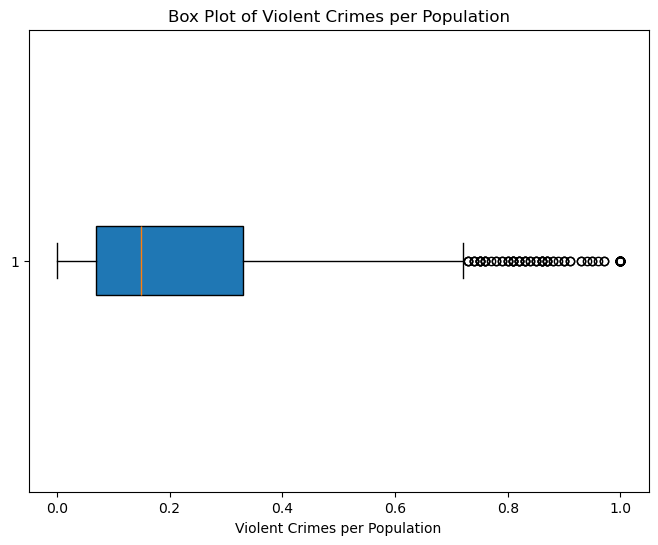

In [102]:
# Plot a box plot
plt.figure(figsize=(8, 6))
plt.boxplot(combined_df['ViolentCrimesPerPop'], vert=False, patch_artist=True)
plt.xlabel('Violent Crimes per Population')
plt.title('Box Plot of Violent Crimes per Population')
plt.show()

Interpretation: 

Median (50th Percentile): The median violent crime rate appears to be around 0.2. This means that half of the communities have a violent crime rate less than this value, and half have more.
IQR (Middle 50% of Data): The box indicates that the middle 50% of communities have violent crime rates ranging from about 0.1 to 0.4.

Skewness: The data is slightly skewed to the right (positive skew), as indicated by the longer right whisker and the presence of many outliers on the high end.

Outliers: There are a significant number of communities with violent crime rates near the upper extreme (close to 1.0), which are considered outliers. This suggests that while most communities have relatively low violent crime rates, a few have much higher rates.

# Histogram

Visualization of the distribution of crime rates across all communities

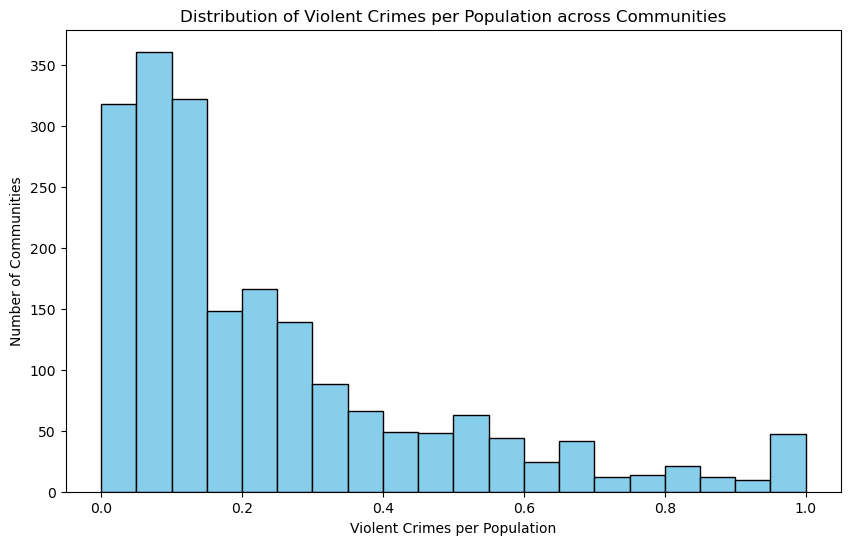

In [103]:
# Plot a histogram
plt.figure(figsize=(10, 6))
plt.hist(combined_df['ViolentCrimesPerPop'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Violent Crimes per Population')
plt.ylabel('Number of Communities')
plt.title('Distribution of Violent Crimes per Population across Communities')
plt.show()

Interpretation:
The histogram illustrating the distribution of violent crimes per population across communities reveals a positive skew, indicating that the majority of communities experience low levels of violent crime. The bulk of the data is clustered towards the lower end of the scale, close to zero, suggesting that most communities have relatively low crime rates.

However, the right tail of the histogram indicates that there are a few communities with significantly higher rates of violent crime. Although these high-crime communities are less common, their presence is noticeable and impacts the overall distribution.

This pattern implies that while most cities have low violent crime rates, targeted interventions may be necessary for the few communities with higher crime rates. To address this issue effectively, policies or programs could be designed to focus on the specific factors contributing to elevated crime rates in these outlier communities.

In [104]:
import plotly.express as px

# Interactive Bar Plot

Interactive exploration of this large dataset

The plot below displays all community names, including duplicates, sorted by violent crimes per population.

In [106]:
combined_df1 = pd.concat([X[['communityname', 'state']], y[['ViolentCrimesPerPop']]], axis=1) 

In [107]:
sorted_df1 = combined_df1.sort_values(by='ViolentCrimesPerPop', ascending=False)

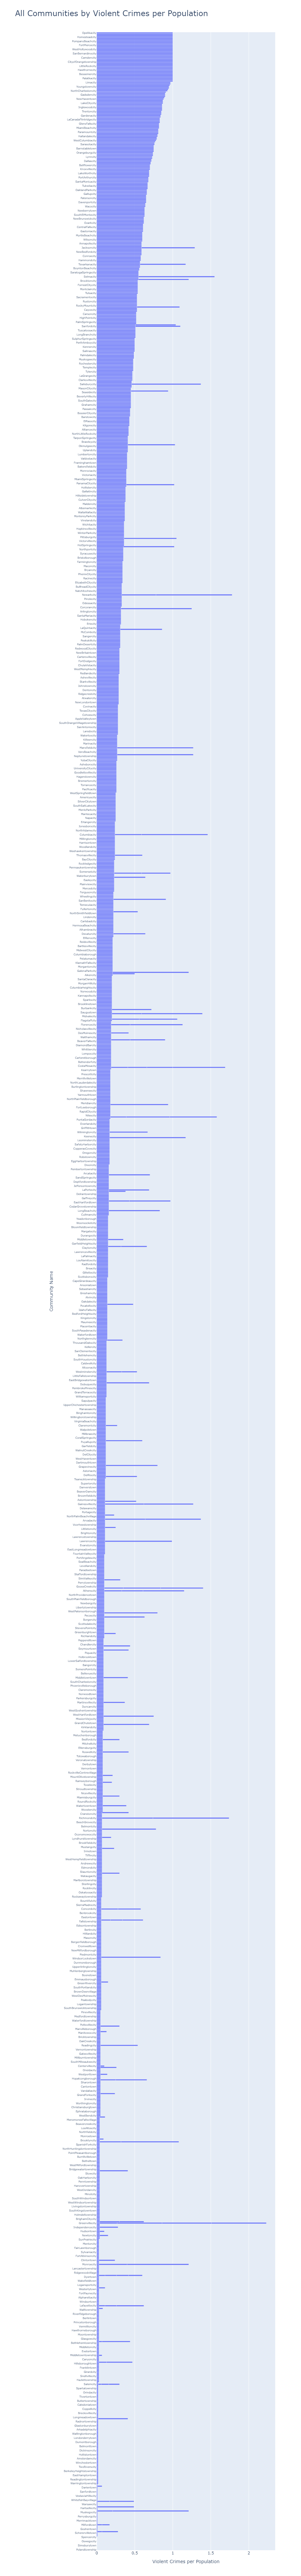

In [108]:
# Sort the DataFrame in ascending order based on 'ViolentCrimesPerPop'
sorted_df1 = sorted_df1.sort_values(by='ViolentCrimesPerPop', ascending=True)

# Create the interactive plot
fig = px.bar(
    sorted_df1,
    x='ViolentCrimesPerPop',  # Values for the length of the bars
    y='communityname',         # Categories on the y-axis
    orientation='h',           # Horizontal bars
    title='All Communities by Violent Crimes per Population',
    labels={'ViolentCrimesPerPop': 'Violent Crimes per Population', 'communityname': 'Community Name'}
)

# Customize layout to make it more readable
fig.update_layout(
    xaxis=dict(
        title="Violent Crimes per Population",
        tickfont=dict(size=12)
    ),
    yaxis=dict(
        title="Community Name",
        tickfont=dict(size=8)
    ),
    title_font_size=24,
    margin=dict(l=300),  # Increase left margin to accommodate longer names
    height=8000  # Adjust the height to make it scrollable if there are many entries
)

# Show the interactive plot
fig.show()

# Horizontal Interactive Bar Plot 

The plot below displays all community names, excluding duplicates, sorted by violent crimes per population.

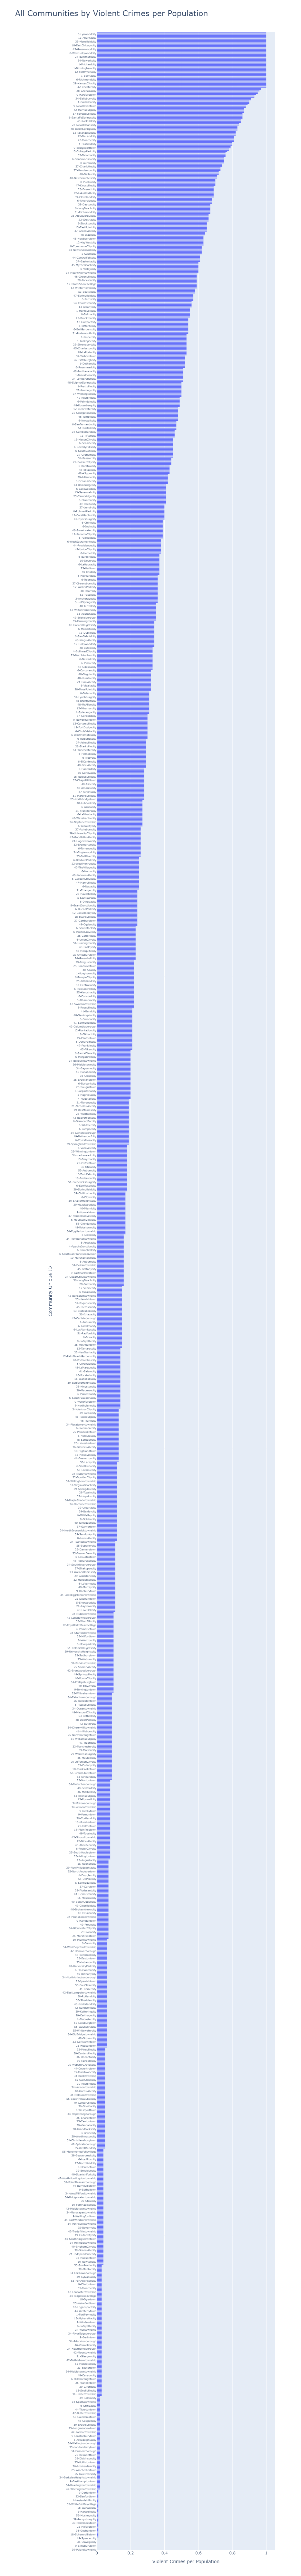

In [110]:
# Sort the DataFrame in ascending order based on 'ViolentCrimesPerPop'
sorted_df = sorted_df.sort_values(by='ViolentCrimesPerPop', ascending=True)

# Create the interactive plot using 'Unique ID' instead of 'communityname'
fig = px.bar(
    sorted_df,
    x='ViolentCrimesPerPop',  # Values for the length of the bars
    y='Unique ID',            # Categories on the y-axis (Unique ID)
    orientation='h',          # Horizontal bars
    title='All Communities by Violent Crimes per Population',
    labels={'ViolentCrimesPerPop': 'Violent Crimes per Population', 'Unique ID': 'Community Unique ID'}
)

# Customize layout to make it more readable
fig.update_layout(
    xaxis=dict(
        title="Violent Crimes per Population",
        tickfont=dict(size=12)
    ),
    yaxis=dict(
        title="Community Unique ID",
        tickfont=dict(size=8)
    ),
    title_font_size=24,
    margin=dict(l=300),  # Increase left margin to accommodate longer names
    height=8000  # Adjust the height to make it scrollable if there are many entries
)

# Show the interactive plot
fig.show()

In [111]:
X.head()

state county community        communityname  fold  population  \
0      8    NaN       NaN         Lakewoodcity     1        0.19   
1     53    NaN       NaN          Tukwilacity     1        0.00   
2     24    NaN       NaN         Aberdeentown     1        0.00   
3     34      5     81440  Willingborotownship     1        0.04   
4     42     95      6096    Bethlehemtownship     1        0.01   

   householdsize  racepctblack  racePctWhite  racePctAsian  ...  \
0           0.33          0.02          0.90          0.12  ...   
1           0.16          0.12          0.74          0.45  ...   
2           0.42          0.49          0.56          0.17  ...   
3           0.77          1.00          0.08          0.12  ...   
4           0.55          0.02          0.95          0.09  ...   

   PolicAveOTWorked  LandArea  PopDens  PctUsePubTrans  PolicCars  \
0              0.29      0.12     0.26            0.20       0.06   
1               NaN      0.02     0.12            0.45        NaN   
2               NaN      0.01     0.21            0.02        NaN   
3               NaN      0.02     0.39            0.28        NaN   
4               NaN      0.04     0.09            0.02        NaN   

   PolicOperBudg  LemasPctPolicOnPatr  LemasGangUnitDeploy  \
0           0.04                  0.9                  0.5   
1            NaN                  NaN                  NaN   
2            NaN                  NaN                  NaN   
3            NaN                  NaN                  NaN   
4            NaN                  NaN                  NaN   

   LemasPctOfficDrugUn  PolicBudgPerPop  
0                 0.32             0.14  
1                 0.00              NaN  
2                 0.00              NaN  
3                 0.00              NaN  
4                 0.00              NaN  

[5 rows x 127 columns]

# 1. Multiple Linear Regression Analysis Tests

The selected variables are chosen based on strain theory.

# Anomie Theory (Durkheim/Merton)

Anomie refers to a breakdown of social norms, often resulting from rapid social change or economic disparity, leading to feelings of normlessness. Variables reflecting social inequality, poverty, and lack of social integration would be of help.

In [126]:
df3 = pd.DataFrame(X)
desired_filtered = ['medIncome', 'PctPopUnderPov', 'PctNotHSGrad', 'PctUnemployed', 'PctHousNoPhone', 'PctWOFullPlumb', 'PctVacMore6Mos', 'PctHousLess3BR']

df_filtered = df[desired_filtered]
df_filtered

medIncome  PctPopUnderPov  PctNotHSGrad  PctUnemployed  PctHousNoPhone  \
0          0.37            0.19          0.18           0.27            0.14   
1          0.31            0.24          0.24           0.27            0.16   
2          0.30            0.27          0.43           0.36            0.47   
3          0.58            0.10          0.25           0.33            0.11   
4          0.50            0.06          0.30           0.12            0.05   
...         ...             ...           ...            ...             ...   
1989       0.42            0.16          0.11           0.12            0.07   
1990       0.28            0.32          0.37           0.24            0.17   
1991       0.31            0.31          0.58           0.50            0.31   
1992       0.44            0.16          0.35           0.37            0.10   
1993       0.40            0.35          0.55           0.47            0.32   

      PctWOFullPlumb  PctVacMore6Mos  PctHousLess3BR  
0               0.06            0.26            0.51  
1               0.00            0.25            0.82  
2               0.45            0.30            0.51  
3               0.11            0.47            0.01  
4               0.14            0.55            0.19  
...              ...             ...             ...  
1989            0.09            0.21            0.49  
1990            0.37            0.13            0.60  
1991            0.29            0.45            0.66  
1992            0.34            0.34            0.64  
1993            0.21            0.16            0.55  

[1994 rows x 8 columns]

In [127]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(df_filtered, scy, test_size=0.2, random_state=42)

In [128]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
model = LinearRegression()

# Fit the model on training data
model.fit(X_train, y_train)

# Predict on testing data
y_pred = model.predict(X_test)

# Evaluate the model
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'R-squared Score: {r2_score(y_test, y_pred)}')

# Coefficients
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')

Mean Squared Error: 0.028785840136303836
R-squared Score: 0.3989896387916908
Coefficients: [[ 0.25787361  0.21479408  0.11239269  0.1694484   0.18186224  0.03964769
  -0.07789327  0.42355608]]
Intercept: [-0.25756545]


These values are from a linear regression model, and they provide information about how well the model is performing and the relationship between the features (independent variables) and the target (dependent variable).

1. Mean Squared Error
   
A lower MSE indicates better model performance. In this case, the MSE is 0.0287, meaning the model's predictions are, on average, off by about 0.0287 squared units. The closer this value is to zero, the better the model fits the data.

3. R-squared Score
   
Here, an 𝑅2 value of 0.3989 means that approximately 39.9% of the variance in the target variable is explained by the independent variables. This suggests the model is providing some predictive power, but there’s still room for improvement.

4. Coefficients
   
Positive coefficients mean that an increase in the corresponding feature leads to an increase in the target value, while negative coefficients mean that an increase in the feature leads to a decrease in the target value.

For example: A coefficient of 0.25787361 for the first feature means that a 1-unit increase in this feature is expected to increase the target by about 0.2579 units, holding other variables constant.
A coefficient of -0.07789327 for the seventh feature means that a 1-unit increase in this feature is expected to decrease the target by about 0.0779 units.

4. Intercept
   
In this case, when all features are zero, the expected target value is -0.2576. This gives the starting point of the regression line before adding the contributions from each feature.

6. Overall Interpretation
   
The MSE indicates how much error there is in the model’s predictions.
The R-squared score shows that the model explains about 40% of the variability in the target variable, meaning there’s still unexplained variance.
The coefficients tell you how much each feature impacts the target, and the intercept tells you the starting point of the model's predictions.

Improving the model might involve tuning the features, adding more relevant data, or using a more complex algorithm. This can be done by excluding or including variables. 

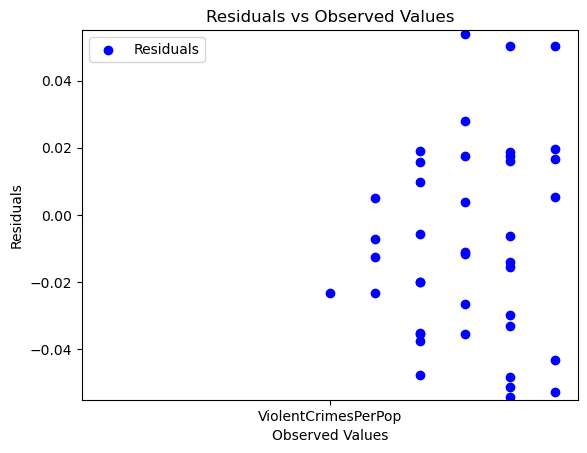

In [129]:
# Plotting residuals
plt.scatter(y_test, y_test - y_pred, color='blue', label='Residuals')
plt.hlines(y=0, xmin=min(y_test), xmax=max(y_test), colors='red', linestyles='--')
plt.xlabel('Observed Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Observed Values')
plt.legend()
plt.show()

In [130]:
# Add a constant (intercept) to the independent variables
X_with_const = sm.add_constant(df_filtered)

# Fit the multiple regression model
model = sm.OLS(scy, X_with_const).fit()

# Print the summary of the regression
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.384
Model:                             OLS   Adj. R-squared:                  0.382
Method:                  Least Squares   F-statistic:                     154.8
Date:                 Mon, 16 Sep 2024   Prob (F-statistic):          9.88e-203
Time:                         16:16:40   Log-Likelihood:                 559.33
No. Observations:                 1994   AIC:                            -1101.
Df Residuals:                     1985   BIC:                            -1050.
Df Model:                            8                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.2474      0.0

Model Summary:
* R-squared = 0.384: This means that the model explains 38.4% of the variance in the violent crime rate. While not very high, it indicates that the independent variables do contribute to explaining some portion of the variation in crime rates.

* Adj. R-squared = 0.382: Adjusted R-squared accounts for the number of predictors in the model, and it's slightly lower than R-squared, which is expected when adding variables that don’t significantly improve the model.

* F-statistic = 154.8 and Prob (F-statistic) = 9.88e-203: This indicates that the model as a whole is statistically significant. The small p-value (near zero) shows that at least one of your predictors has a statistically significant relationship with violent crime rates.

* Coefficients:
The coef column shows the impact of each variable on ViolentCrimesPerPop.
The P>|t| column shows the p-value, which tells you if the coefficient is statistically significant.
Interpreting Variables:
Constant (const) = -0.2474: This is the predicted value of the dependent variable when all other variables are zero, but it doesn't have much interpretation in this context.

1) medIncome (coef = 0.2582, p < 0.001):

Statistically significant (p-value near 0).
Interpretation: A higher median income is associated with a higher violent crime rate. For each unit increase in median income, the violent crime rate increases by 0.2582 units.

2) PctPopUnderPov (coef = 0.2106, p < 0.001):

Statistically significant.
Interpretation: A higher percentage of the population under the poverty line is associated with a higher violent crime rate. For each unit increase in poverty, the violent crime rate increases by 0.2106 units.

3) PctNotHSGrad (coef = 0.1360, p < 0.001):

Statistically significant.
Interpretation: Higher percentages of people not graduating high school are associated with higher violent crime rates.

4) PctUnemployed (coef = 0.1949, p < 0.001):

Statistically significant.
Interpretation: Unemployment is positively associated with the violent crime rate.

5) PctHousNoPhone (coef = 0.1761, p < 0.001):

Statistically significant.
Interpretation: A higher percentage of households without a phone is associated with a higher violent crime rate.

6) PctWOFullPlumb (coef = 0.0152, p = 0.557):

Not statistically significant (p = 0.557).
Interpretation: This variable likely does not have a meaningful impact on violent crime rates.

7) PctVacMore6Mos (coef = -0.0962, p < 0.001):

Statistically significant.
Interpretation: A higher percentage of housing vacant for more than 6 months is associated with a lower violent crime rate.

8) PctHousLess3BR (coef = 0.3973, p < 0.001):

Statistically significant.
Interpretation: A higher percentage of housing units with fewer than 3 bedrooms is associated with a higher violent crime rate.


Diagnostics:
* Durbin-Watson = 2.033: This statistic tests for autocorrelation in the residuals. A value near 2 suggests there is no autocorrelation, which is good.

* Omnibus and Jarque-Bera (JB) tests: These tests for normality of residuals show significant results, indicating that the residuals may not be normally distributed. This could impact the validity of certain assumptions in your model.

Conclusion:
Several variables are statistically significant predictors of violent crime rates, including medIncome, PctPopUnderPov, PctNotHSGrad, PctUnemployed, PctHousNoPhone, PctVacMore6Mos, and PctHousLess3BR. However, PctWOFullPlumb is not significant, suggesting that the presence or absence of full plumbing doesn't have a strong influence on crime rates in this model; to test for a better model I could have excluded the last non-significant variable. 

Important observation from the above:

From the above mentioned it was observed that "A higher median income is associated with a higher violent crime rate".

Typically, we would expect that higher median income is associated with lower crime rates. This is because wealthier areas generally have better access to resources, education, and opportunities, which are factors that can contribute to lower crime rates.

Possible Reasons for Unexpected Results:
Model Specification Issues: If the model isn't capturing all relevant variables or if there are omitted variables that affect crime rates, it might produce unexpected results. For instance, if there are economic inequalities within a higher-income area that aren't accounted for, this could skew results.

* Multicollinearity: If median income is highly correlated with other predictors in the model, it might affect the coefficient's sign and magnitude.

* Data Anomalies: Specific characteristics of the dataset, such as outliers or unusual distributions, might be affecting the results.

* Reverse Causality: There could be situations where higher crime rates are leading to changes in economic conditions or perceptions of income, though this is less common.

* Anomie Theory to be "right": The results could be interpreted in the context of anomie theory, though it's important to be cautious with such interpretations.

Here’s how the anomie theory might relate to your findings:

* Developed by Émile Durkheim, anomie theory suggests that crime occurs when there is a breakdown of social norms and values, often due to rapid social change or economic inequality. According to this theory, when individuals experience a disconnect from societal norms, or when there is a disparity between goals and means, crime can increase.

Interpretation of the Results:

* Higher Median Income and Higher Crime Rate: The finding that a higher median income is associated with a higher violent crime rate seems counterintuitive but could suggest that in some contexts, economic inequality or disparities within a higher-income area might be at play.

* Economic Inequality: If a higher median income comes with increased income inequality, this might contribute to social strain or feelings of inadequacy among those who are less well-off within that community. This could lead to higher crime rates as people may feel disconnected from societal norms.

* Anomie or Strain: The result might indicate that even in wealthier areas, social strain or anomie could be present. For instance, if the income distribution is highly skewed, individuals who fall below the median income might experience strain and frustration, potentially leading to higher crime rates.

Re-evaluating the data and improving the model:

* Check Data and Model: Review the data for outliers or anomalies. Ensure that the model is correctly specified and that all relevant variables are included.

* Consider Alternative Models: Try different model specifications or include interaction terms to see if the relationship changes.

* Consult Literature: Compare your findings with existing research. There may be contextual factors or specific conditions in your dataset that are different from the general trends observed in other studies.

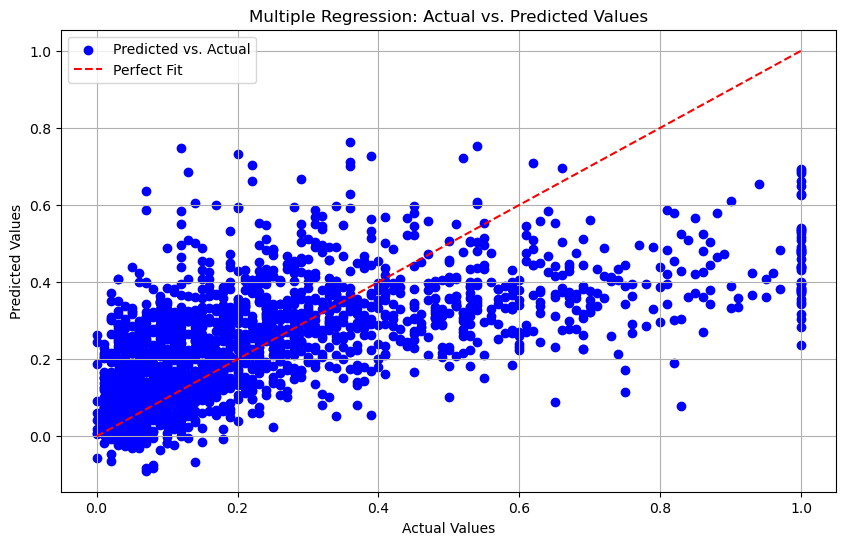

In [131]:
# Get predictions
predictions = model.predict(X_with_const)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(scy, predictions, color='blue', label='Predicted vs. Actual')
plt.plot([scy.min(), scy.max()], [scy.min(), scy.max()], color='red', linestyle='--', label='Perfect Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Multiple Regression: Actual vs. Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

# 2. Multiple Linear Regression Analysis Tests

The selected variables are chosen based on strain theory.

# Strain Theory (Merton/Agnew)

Strain theory suggests that individuals experience strain or stress when they are unable to achieve societal goals through legitimate means, potentially leading to criminal behavior. Variables that highlight economic stress, inequality, and lack of opportunities would be of help.

In [145]:
df4 = pd.DataFrame(X)
des_filtered = ['medIncome', 'pctWPubAsst', 'PctLess9thGrade', 'PctNotHSGrad', 'PctUnemployed', 'PctIlleg', 'NumUnderPov']

df_filt = df[des_filtered]
df_filt

medIncome  pctWPubAsst  PctLess9thGrade  PctNotHSGrad  PctUnemployed  \
0          0.37         0.15             0.10          0.18           0.27   
1          0.31         0.29             0.14          0.24           0.27   
2          0.30         0.40             0.27          0.43           0.36   
3          0.58         0.20             0.09          0.25           0.33   
4          0.50         0.11             0.25          0.30           0.12   
...         ...          ...              ...           ...            ...   
1989       0.42         0.06             0.08          0.11           0.12   
1990       0.28         0.37             0.33          0.37           0.24   
1991       0.31         0.48             0.52          0.58           0.50   
1992       0.44         0.24             0.30          0.35           0.37   
1993       0.40         0.47             0.50          0.55           0.47   

      PctIlleg  NumUnderPov  
0         0.14         0.08  
1         0.24         0.01  
2         0.46         0.01  
3         0.33         0.01  
4         0.06         0.00  
...        ...          ...  
1989      0.11         0.01  
1990      0.42         0.04  
1991      0.54         0.12  
1992      0.17         0.03  
1993      0.43         0.16  

[1994 rows x 7 columns]

In [146]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(df_filt, scy, test_size=0.2, random_state=42)

In [147]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
model = LinearRegression()

# Fit the model on training data
model.fit(X_train, y_train)

# Predict on testing data
y_pred = model.predict(X_test)

# Evaluate the model
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'R-squared Score: {r2_score(y_test, y_pred)}')

# Coefficients
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')

Mean Squared Error: 0.021647031840011544
R-squared Score: 0.5480385368761507
Coefficients: [[-0.021641    0.11142621 -0.2629765   0.30420118 -0.01254534  0.57988132
   0.26129492]]
Intercept: [0.02373668]


These values are from a linear regression model, and they provide information about how well the model is performing and the relationship between the features (independent variables) and the target (dependent variable).

1. Mean Squared Error
   The MSE of 0.0216 suggests that, on average, the squared errors of your predictions are quite small, which implies that the model fits the data relatively well.

2. R-squared Score
   The R-squared of 0.5480 means that approximately 54.8% of the variance in the dependent variable is explained by the model. This is a moderate level of explanatory power, indicating that the model explains a significant portion of the variance but there is still room for improvement.
   
3. Coefficients
   Interpretation: Each coefficient represents the change in the dependent variable for a one-unit change in the corresponding independent variable, holding all other variables constant. Here’s a brief interpretation of each coefficient:


* −0.0216: For the first independent variable, a one-unit increase is associated with a decrease in the dependent variable by 0.0216 units.

* 0.1114: For the second independent variable, a one-unit increase is associated with an increase in the dependent variable by 0.1114 units.

* −0.2630: For the third independent variable, a one-unit increase is associated with a decrease in the dependent variable by 0.2630 units.

* 0.3042: For the fourth independent variable, a one-unit increase is associated with an increase in the dependent variable by 0.3042 units.

* −0.0125: For the fifth independent variable, a one-unit increase is associated with a decrease in the dependent variable by 0.0125 units.

* 0.5799: For the sixth independent variable, a one-unit increase is associated with an increase in the dependent variable by 0.5799 units.

* 0.2613: For the seventh independent variable, a one-unit increase is associated with an increase in the dependent variable by 0.2613 units.
4. Intercept
  The intercept represents the predicted value of the dependent variable when all independent variables are zero. In this case, when all the independent variables are zero, the predicted value of the dependent variable is 0.0237.

Summary
* The model has a moderate R-squared score (0.5480), indicating that it explains about 54.8% of the variability in the dependent variable.
* The Mean Squared Error (0.0216) is relatively low, suggesting good predictive accuracy.
* The coefficients provide insight into the impact of each independent variable on the dependent variable. Positive coefficients indicate a direct relationship, while negative coefficients indicate an inverse relationship.

Overall, the model appears to fit the data reasonably well, but there is room for improvement, especially considering that nearly half of the variability in the dependent variable is not explained by the model.

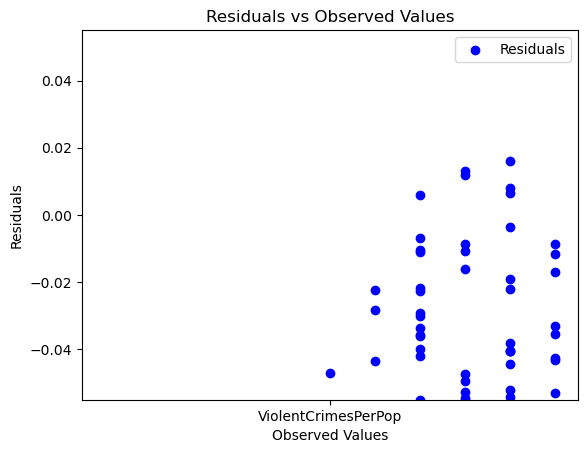

In [148]:
# Plotting residuals
plt.scatter(y_test, y_test - y_pred, color='blue', label='Residuals')
plt.hlines(y=0, xmin=min(y_test), xmax=max(y_test), colors='red', linestyles='--')
plt.xlabel('Observed Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Observed Values')
plt.legend()
plt.show()

In [155]:
# Add a constant (intercept) to the independent variables
X_with_const1 = sm.add_constant(df_filt)

# Fit the multiple regression model
model1 = sm.OLS(scy, X_with_const1).fit()

# Print the summary of the regression
print(model1.summary())

                             OLS Regression Results                            
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.578
Model:                             OLS   Adj. R-squared:                  0.576
Method:                  Least Squares   F-statistic:                     387.8
Date:                 Mon, 16 Sep 2024   Prob (F-statistic):               0.00
Time:                         16:51:36   Log-Likelihood:                 934.97
No. Observations:                 1994   AIC:                            -1854.
Df Residuals:                     1986   BIC:                            -1809.
Df Model:                            7                                         
Covariance Type:             nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0070      

Model Summary:
* R-squared = 0.578: This indicates that approximately 57.8% of the variance in violent crime rates per population is explained by the model. This is a moderate to high level of explanatory power, showing that the model accounts for a substantial portion of the variability in violent crime rates.
  
* Adjusted R-squared = 0.576: The adjusted R-squared adjusts the R-squared value for the number of predictors in the model. A value of 0.576 means that, even after accounting for the number of predictors, the model still explains a good portion of the variance in violent crime rates.

* F-statistic = 387.8 and F-statistic = 0.00: The F-statistic measures the overall significance of the model. A high F-statistic and a p-value close to 0 (significant) indicate that the model is a good fit and that at least one predictor is significantly related to the dependent variable.
  
* Log-Likelihood = 934.97: This is a measure of the model’s likelihood. Higher values indicate a better fit of the model to the data.
  
* AIC = -1854.0 and BIC = -1809.0: The Akaike Information Criterion (AIC) and the Bayesian Information Criterion (BIC) are used for model comparison. Lower values suggest a better model fit, taking into account the number of parameters.

* Coefficients:  
1) const (0.0070, p = 0.700):The intercept of the model. It represents the expected value of the dependent variable (violent crimes per population) when all predictors are zero. Since the p-value is high, the intercept is not statistically significant.

2) medIncome (0.0034, p = 0.887): The coefficient for median income. It suggests that a one-unit increase in median income is associated with a 0.0034 increase in violent crime rates, but this relationship is not statistically significant (p-value is high).

3) pctWPubAsst (0.1324, p < 0.001): The coefficient for the percentage of the population receiving public assistance. A one-unit increase in this percentage is associated with a 0.1324 increase in violent crime rates. This relationship is statistically significant.

4) ctLess9thGrade (-0.2163, p < 0.001):The coefficient for the percentage of the population with less than 9th grade education. A one-unit increase in this percentage is associated with a 0.2163 decrease in violent crime rates. This relationship is statistically significant.

5) PctNotHSGrad (0.2720, p < 0.001): The coefficient for the percentage of the population without a high school diploma. A one-unit increase in this percentage is associated with a 0.2720 increase in violent crime rates. This relationship is statistically significant.

6) PctUnemployed (-0.0140, p = 0.665): The coefficient for the percentage of unemployed individuals. A one-unit increase in this percentage is associated with a 0.014 decrease in violent crime rates, but this relationship is not statistically significant.

7) PctIlleg (0.5673, p < 0.001): The coefficient for the percentage of the population with illegitimate children. A one-unit increase in this percentage is associated with a 0.5673 increase in violent crime rates. This relationship is statistically significant.

8) NumUnderPov (0.2700, p < 0.001): The coefficient for the number of people under the poverty line. A one-unit increase in this number is associated with a 0.2700 increase in violent crime rates. This relationship is statistically significant.

Summary: 
* The model explains 57.8% of the variance in violent crime rates, which is a strong result.
* The F-statistic indicates that your model as a whole is significant.
* Several predictors are statistically significant, meaning they have a significant impact on violent
crime rates.

Specifically:
* PctWPubAsst, PctLess9thGrade, PctNotHSGrad, PctIlleg, and NumUnderPov are significant predictors, indicating that they have a meaningful association with violent crime rates.
* medIncome and PctUnemployed are not statistically significant in this model, suggesting that they do not have a strong relationship with violent crime rates in this particular dataset.

Interpretation of Significance
* Statistically Significant Predictors: These variables (PctWPubAsst, PctLess9thGrade, PctNotHSGrad, PctIlleg, NumUnderPov) have p-values less than 0.05, indicating a strong relationship with the dependent variable (violent crime rates). Their coefficients show how changes in these variables are associated with changes in violent crime rates.

* Not Statistically Significant Predictors: Variables like medIncome and PctUnemployed have high p-values, suggesting that their effects on violent crime rates are not statistically significant in this model.

Implications
* The results imply that certain socio-economic factors (such as public assistance, education level, illegitimacy rates, and poverty) are more strongly associated with violent crime rates than others. These findings could inform policy and intervention strategies aimed at addressing the root causes of violent crime.

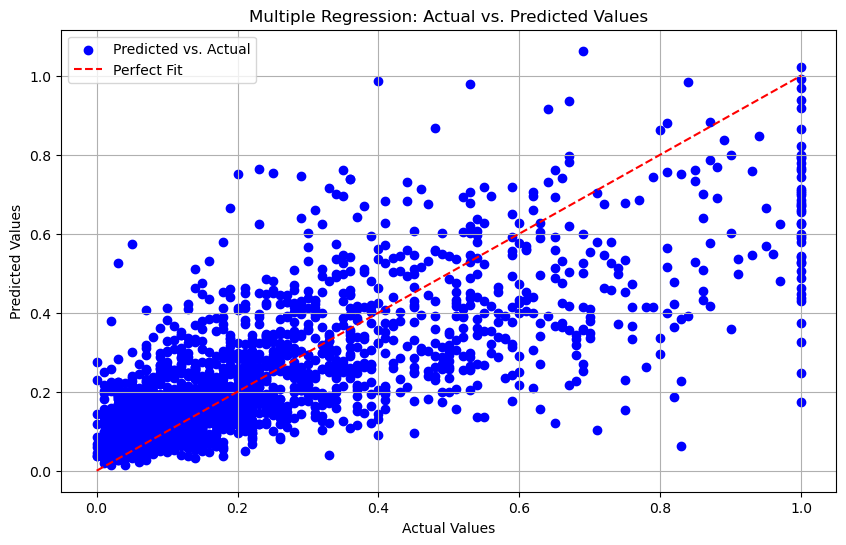

In [150]:
# Get predictions
predictions = model1.predict(X_with_const1)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(scy, predictions, color='blue', label='Predicted vs. Actual')
plt.plot([scy.min(), scy.max()], [scy.min(), scy.max()], color='red', linestyle='--', label='Perfect Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Multiple Regression: Actual vs. Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

# 3. Multiple Linear Regression Analysis Tests

The selected variables are chosen based on differential association theory.

# Differential Association Theory (Sutherland)

Differential Association theory emphasizes that criminal behavior is learned through interactions with others. Social environments that normalize deviant behavior are crucial here, so variables related to community structure, social bonds, and group influences would be of help.

In [151]:
df5 = pd.DataFrame(X)
desir_filtered = ['PctFam2Par', 'PctKids2Par', 'PctOccupMgmtProf', 'PctFam2Par', 'PctImmigRecent', 'PctWorkMom', 'MalePctNevMarr']

df_filter = df[desir_filtered]
df_filter

PctFam2Par  PctKids2Par  PctOccupMgmtProf  PctFam2Par  PctImmigRecent  \
0           0.55         0.59              0.52        0.55            0.24   
1           0.43         0.47              0.36        0.43            0.52   
2           0.42         0.44              0.32        0.42            0.07   
3           0.65         0.54              0.39        0.65            0.11   
4           0.91         0.91              0.46        0.91            0.03   
...          ...          ...               ...         ...             ...   
1989        0.63         0.68              0.70        0.63            0.42   
1990        0.66         0.63              0.24        0.66            0.56   
1991        0.42         0.42              0.32        0.42            0.12   
1992        0.64         0.65              0.48        0.64            0.40   
1993        0.61         0.59              0.24        0.61            0.43   

      PctWorkMom  MalePctNevMarr  
0           0.76            0.40  
1           0.53            0.63  
2           0.67            0.41  
3           0.86            0.45  
4           0.60            0.27  
...          ...             ...  
1989        0.73            0.41  
1990        0.40            0.75  
1991        0.46            0.53  
1992        0.63            0.87  
1993        0.35            0.50  

[1994 rows x 7 columns]

In [152]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(df_filter, scy, test_size=0.2, random_state=42)

In [153]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
model = LinearRegression()

# Fit the model on training data
model.fit(X_train, y_train)

# Predict on testing data
y_pred = model.predict(X_test)

# Evaluate the model
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'R-squared Score: {r2_score(y_test, y_pred)}')

# Coefficients
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')

Mean Squared Error: 0.020459842649477675
R-squared Score: 0.5728254807640764
Coefficients: [[ 0.32154371 -1.496992    0.10137824  0.32154371  0.00501866 -0.13364985
   0.02262263]]
Intercept: [0.78834134]


These values are from a linear regression model, and they provide information about how well the model is performing and the relationship between the features (independent variables) and the target (dependent variable).

* Mean Squared Error: The MSE is a measure of the average squared difference between the predicted values and the actual values. A lower MSE indicates better model performance. In this case, the MSE is relatively low, suggesting that the model's predictions are close to the actual values.
  

* R-squared Score: The R-squared score indicates that approximately 57.3% of the variability in the dependent variable is explained by the model. This is a moderate to high level of explanatory power, indicating that the model does a good job of capturing the variance in the dependent variable.

* Coefficients & Intercept:
  
Intercept (0.78834134): Interpretation: This is the expected value of the dependent variable when all predictors are zero. It serves as the baseline level of the dependent variable. Here, the intercept is 0.788, suggesting that when all predictor variables are zero, the model predicts a value of 0.788 for the dependent variable.

Coefficients:
* 0.32154371: This coefficient is associated with a predictor variable. A one-unit increase in this predictor is associated with a 0.322 unit increase in the dependent variable.
* -1.496992: This coefficient is associated with another predictor variable. A one-unit increase in this predictor is associated with a decrease of 1.497 units in the dependent variable.
* 0.10137824: This coefficient indicates that a one-unit increase in this predictor is associated with a 0.101 unit increase in the dependent variable.
* 0.32154371: (same as the first coefficient) indicates the same effect as above.
* 0.00501866: This coefficient shows that a one-unit increase in this predictor is associated with a 0.005 unit increase in the dependent variable.
* -0.13364985: This coefficient indicates that a one-unit increase in this predictor is associated with a 0.134 unit decrease in the dependent variable.
* 0.02262263: This coefficient suggests that a one-unit increase in this predictor is associated with a 0.023 unit increase in the dependent variable.


Summary: 

* Model Performance: The model explains about 57.3% of the variability in the dependent variable, which is a good level of explanatory power. The low MSE indicates that the model's predictions are relatively accurate.

* Coefficients: The coefficients provide insight into how each predictor affects the dependent variable. Positive coefficients indicate a direct relationship (i.e., an increase in the predictor leads to an increase in the dependent variable), while negative coefficients indicate an inverse relationship.

* Intercept: The intercept shows the baseline level of the dependent variable when all predictors are zero.

Overall, this model seems to perform well and provides useful information about the relationships between the predictors and the dependent variable.

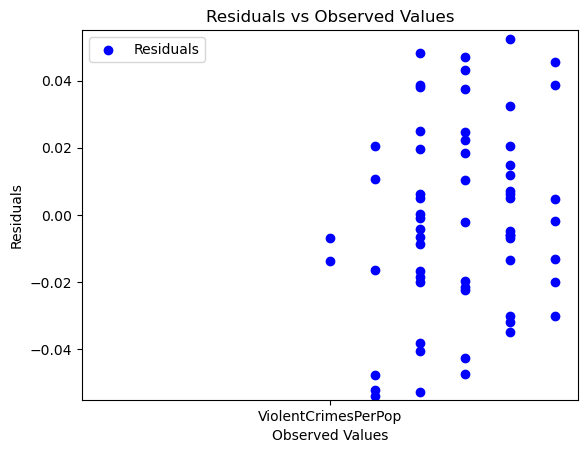

In [154]:
# Plotting residuals
plt.scatter(y_test, y_test - y_pred, color='blue', label='Residuals')
plt.hlines(y=0, xmin=min(y_test), xmax=max(y_test), colors='red', linestyles='--')
plt.xlabel('Observed Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Observed Values')
plt.legend()
plt.show()

In [156]:
# Add a constant (intercept) to the independent variables
X_with_const2 = sm.add_constant(df_filter)

# Fit the multiple regression model
model = sm.OLS(scy, X_with_const2).fit()

# Print the summary of the regression
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.576
Model:                             OLS   Adj. R-squared:                  0.575
Method:                  Least Squares   F-statistic:                     450.2
Date:                 Mon, 16 Sep 2024   Prob (F-statistic):               0.00
Time:                         16:53:04   Log-Likelihood:                 931.83
No. Observations:                 1994   AIC:                            -1850.
Df Residuals:                     1987   BIC:                            -1810.
Df Model:                            6                                         
Covariance Type:             nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.7811   

Model overview:

* R-squared = 0.576: About 57.6% of the variance in the rate of violent crimes per population is explained by the model. This indicates a moderate to high level of explanatory power.

* Adj. R-squareed = 0.575: The adjusted R-squared is very close to the R-squared, indicating that the model is a good fit and has accounted for the number of predictors used. 

* F-statistic = 450.2: The F-statistic tests whether at least one predictor variable has a non-zero coefficient. A high F-statistic with a p-value of 0.00 indicates that the model is statistically significant and that the predictors collectively have a strong relationship with the dependent variable.

* Prob (F-statistic) = 0.00: This p-value indicates that the overall regression model is statistically significant, with predictors reliably explaining variance in the dependent variable.

* Log-Likelihood = 931.83: This value is used in the context of model comparison and likelihood-based criteria, with higher values indicating a better fit.

* AIC = -1850: A lower AIC suggests a better fit of the model relative to others. It is used for model comparison, where smaller values indicate a better model.

* BIC = -1810: Similar to AIC, a lower BIC indicates a better model. BIC also penalizes for model complexity, so it can be useful for comparing models with different numbers of predictors. 

* Coefficients and Intercept:
  
1) const (Intercept) = 0.7811: The intercept represents the expected value of the dependent variable (ViolentCrimesPerPop) when all predictor variables are zero. Here, it’s 0.7811, indicating the baseline level of violent crime per population in the absence of all other predictors.


2) PctFam2Par = 0.3895: For each percentage point increase in the proportion of families with two parents, the violent crime rate increases by 0.3895 units. This predictor is statistically significant with a p-value of 0.000.

3) PctKids2Par = -1.6208: For each percentage point increase in the proportion of children living with two parents, the violent crime rate decreases by 1.6208 units. This predictor is statistically significant with a p-value of 0.000.


4) PctOccupMgmtProf = 0.1009: For each percentage point increase in the proportion of the population employed in management or professional occupations, the violent crime rate increases by 0.1009 units. This predictor is statistically significant with a p-value of 0.000.

5) PctImmigRecent = 0.0041: For each percentage point increase in the proportion of recent immigrants, the violent crime rate increases by 0.0041 units. However, this predictor is not statistically significant with a p-value of 0.816.

6) PctWorkMom = -0.1305: For each percentage point increase in the proportion of working mothers, the violent crime rate decreases by 0.1305 units. This predictor is statistically significant with a p-value of 0.000.

7) MalePctNevMarr = 0.0228: For each percentage point increase in the proportion of males who have never been married, the violent crime rate increases by 0.0228 units. This predictor is not statistically significant with a p-value of 0.338.

Additional Notes:

* Omnibus Test: Tests whether the residuals are normally distributed. The high value and low p-value suggest that the residuals may not be perfectly normally distributed, which can indicate model misspecification.

* Durbin-Watson = 2.027: This value is close to 2, suggesting that there is no strong evidence of autocorrelation in the residuals.

* Condition Number = 1.52e+17: A very high condition number might indicate multicollinearity problems among the predictors. This could mean that some predictors are highly correlated with each other, which can affect the stability and reliability of the regression coefficients.

Overall, this model shows a good fit with significant predictors explaining a substantial portion of the variance in violent crime rates. However, multicollinearity might be a concern, and further investigation into predictor relationships could be beneficial.


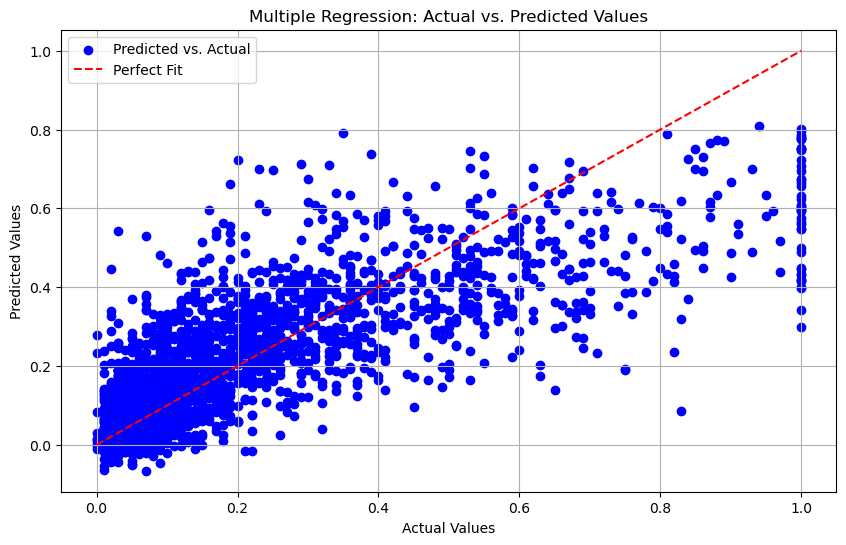

In [158]:
# Get predictions
predictions3 = model.predict(X_with_const2)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(scy, predictions3, color='blue', label='Predicted vs. Actual')
plt.plot([scy.min(), scy.max()], [scy.min(), scy.max()], color='red', linestyle='--', label='Perfect Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Multiple Regression: Actual vs. Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

# Single Regression Analysis Tests

An example of a single regression analysis.

In [161]:
df = pd.DataFrame(X)
single_filter = ['PctPopUnderPov']

df_single_filtered = df[single_filter]
df_single_filtered

PctPopUnderPov
0               0.19
1               0.24
2               0.27
3               0.10
4               0.06
...              ...
1989            0.16
1990            0.32
1991            0.31
1992            0.16
1993            0.35

[1994 rows x 1 columns]

In [162]:
# Filter the DataFrame to include only the desired column
df_single_filtered = df[single_filter]

# Assuming scy is a Series with the dependent variable
# Combine df_single_filtered and scy into a single DataFrame
df_combined = pd.concat([df_single_filtered.reset_index(drop=True), scy.reset_index(drop=True)], axis=1)

# Rename the columns for clarity
df_combined.columns = single_filter + ['scy']

print(df_combined.head(1993))

      PctPopUnderPov   scy
0               0.19  0.20
1               0.24  0.67
2               0.27  0.43
3               0.10  0.12
4               0.06  0.03
...              ...   ...
1988            0.76  0.19
1989            0.16  0.09
1990            0.32  0.45
1991            0.31  0.23
1992            0.16  0.19

[1993 rows x 2 columns]


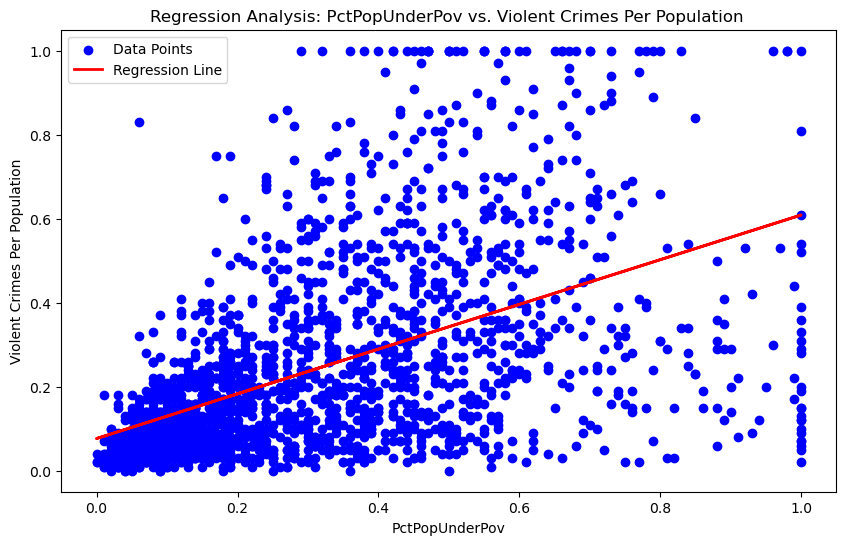

In [163]:
# Step 2: Fit the regression model
model = LinearRegression()
model.fit(df_single_filtered, scy)

# Get the predicted values
scy_pred = model.predict(df_single_filtered)

# Step 3: Plot the data and regression line
plt.figure(figsize=(10, 6))

# Scatter plot of the actual data points
plt.scatter(df_single_filtered, scy, color='blue', label='Data Points')

# Plot the regression line
plt.plot(df_single_filtered, scy_pred, color='red', linewidth=2, label='Regression Line')

# Add labels and title
plt.xlabel('PctPopUnderPov')
plt.ylabel('Violent Crimes Per Population')
plt.title('Regression Analysis: PctPopUnderPov vs. Violent Crimes Per Population ')
plt.legend()

# Show the plot
plt.show()